# KNMI

In [145]:
from urllib.parse import urlparse

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
year = 2024
stations = {
    260: 'De Bilt',
    279: 'Hoogeveen',
}

start = f'{year}-01-01'
end = f'{year}-12-31'
stns = ':'.join(map(str, stations.keys()))
vars = ':'.join(['TG','TN','TX'])

url = 'https://www.daggegevens.knmi.nl/klimatologie/daggegevens'

url += f'?start={start}'
url += f'&end={end}'
url += f'&stns={stns}'
url += f'&vars={vars}'

print(url)


https://www.daggegevens.knmi.nl/klimatologie/daggegevens?start=2024-01-01&end=2024-12-31&stns=260:279&vars=TG:TN:TX


In [125]:
df = pd.read_csv(url, skiprows=11)
df

,# STN,YYYYMMDD,TG,TN,TX
0,260,20240101,74,64,91
1,260,20240102,105,68,129
2,260,20240103,94,80,110
3,260,20240104,76,60,92
4,260,20240105,70,51,90
...,...,...,...,...,...
727,279,20241227,21,-3,44
728,279,20241228,-9,-17,-3
729,279,20241229,32,-4,53
730,279,20241230,65,50,77


In [62]:
df = df.rename(columns=lambda s: s.strip())
df = df.rename(columns={'# STN': 'STN'})

df[['TG','TN','TX']] = df[['TG','TN','TX']] / 10

df['station'] = df['STN'].replace(stations)

df['dd'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

df


,STN,YYYYMMDD,TG,TN,TX,station,dd
0,260,20240101,7.4,6.4,9.1,De Bilt,2024-01-01
1,260,20240102,10.5,6.8,12.9,De Bilt,2024-01-02
2,260,20240103,9.4,8.0,11.0,De Bilt,2024-01-03
3,260,20240104,7.6,6.0,9.2,De Bilt,2024-01-04
4,260,20240105,7.0,5.1,9.0,De Bilt,2024-01-05
...,...,...,...,...,...,...,...
727,279,20241227,2.1,-0.3,4.4,Hoogeveen,2024-12-27
728,279,20241228,-0.9,-1.7,-0.3,Hoogeveen,2024-12-28
729,279,20241229,3.2,-0.4,5.3,Hoogeveen,2024-12-29
730,279,20241230,6.5,5.0,7.7,Hoogeveen,2024-12-30


In [70]:
df_year = pd.pivot(df,
                   index = 'dd',
                   columns = 'station',
                   values = 'TG')

df_year

station,De Bilt,Hoogeveen
dd,,
2024-01-01,7.4,6.9
2024-01-02,10.5,9.3
2024-01-03,9.4,8.8
2024-01-04,7.6,4.6
2024-01-05,7.0,4.8
...,...,...
2024-12-27,2.5,2.1
2024-12-28,1.0,-0.9
2024-12-29,4.0,3.2


In [97]:
df_year.describe()

station,De Bilt,Hoogeveen
count,366.000000,366.000000
mean,11.798361,11.268306
std,5.700954,5.814430
min,-3.200000,-4.000000
25%,7.525000,6.900000
50%,11.500000,11.100000
75%,16.375000,16.000000
max,24.500000,25.100000


<Axes: xlabel='dd'>

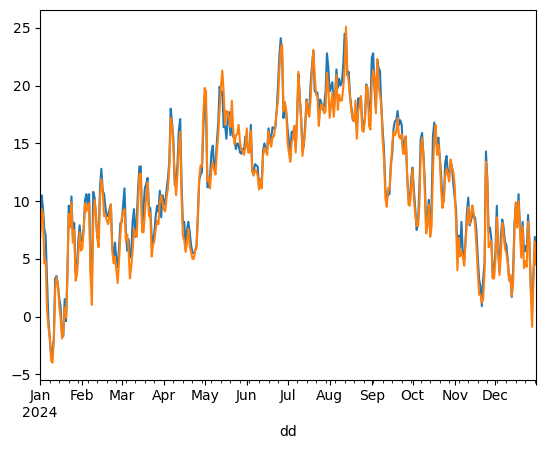

In [96]:
df_year['De Bilt'].plot()
df_year['Hoogeveen'].plot()

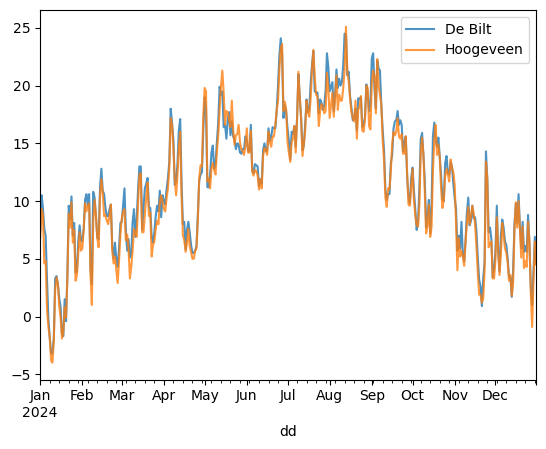

In [80]:
df_year['De Bilt'].plot(label='De Bilt', alpha=0.8)
df_year['Hoogeveen'].plot(label='Hoogeveen', alpha=0.8)
plt.legend()
plt.show()


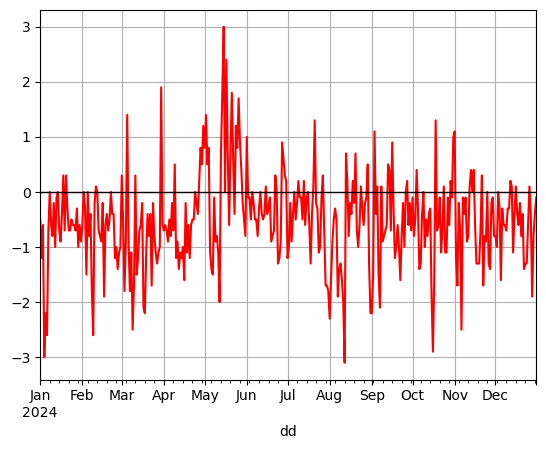

In [87]:
diff = df_year['Hoogeveen'] - df_year['De Bilt']
diff.plot(color='red')
plt.grid()
plt.axhline(0, linewidth=1, color='k')
plt.show()

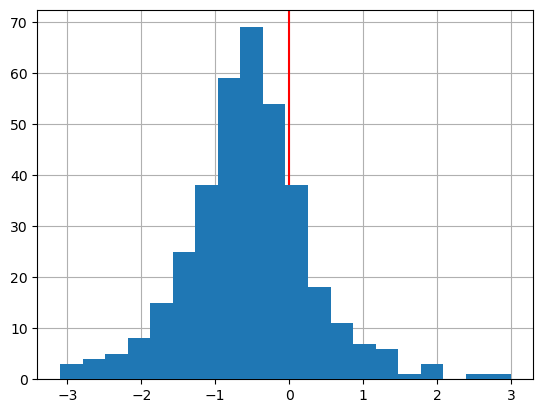

In [95]:
plt.axvline(0, color='red')
plt.hist(diff, bins=20, zorder=10)
plt.grid()
plt.show()

In [102]:
from scipy import stats
t, p = stats.ttest_1samp(diff, 0)

print("The t-statistic is %.3f and the p-value is %.5f." % (t, p/2))

The t-statistic is -12.178 and the p-value is 0.00000.
